In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.2.1-bin-hadoop3.2"
!pip install -q findspark

In [3]:
# checking spark documentation

import findspark
findspark.init()
findspark.find()

'spark-3.2.1-bin-hadoop3.2'

In [4]:
#create session
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Proyek_Bda").getOrCreate()

In [5]:
#upload file
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [7]:
#read csv and showing data type
df = spark.read.csv('/content/diabetes.csv', header = True)
df.printSchema()
df.show()

root
 |-- Pregnancies: string (nullable = true)
 |-- Glucose: string (nullable = true)
 |-- BloodPressure: string (nullable = true)
 |-- SkinThickness: string (nullable = true)
 |-- Insulin: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- DiabetesPedigreeFunction: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Outcome: string (nullable = true)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     

In [8]:
# change string to int data type

from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType,BooleanType,DateType


df = df.withColumn("Pregnancies",df.Pregnancies.cast('int'))
df = df.withColumn("Glucose",df.Glucose.cast('int'))
df = df.withColumn("BloodPressure",df.BloodPressure.cast('int'))
df = df.withColumn("SkinThickness",df.SkinThickness.cast('int'))
df = df.withColumn("Insulin",df.Insulin.cast('int'))
df = df.withColumn("BMI",df.BMI.cast('double'))
df = df.withColumn("DiabetesPedigreeFunction",df.DiabetesPedigreeFunction.cast('float'))
df = df.withColumn("Age",df.Age.cast('int'))
df = df.withColumn("Outcome",df.Outcome.cast('int'))


df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: float (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [10]:
#look for the summary
df['Pregnancies','Glucose','BMI','Age'].summary().show()

+-------+------------------+-----------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|               BMI|               Age|
+-------+------------------+-----------------+------------------+------------------+
|  count|               768|              768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|31.992578124999977|33.240885416666664|
| stddev|  3.36957806269887|31.97261819513622| 7.884160320375441|11.760231540678689|
|    min|                 0|                0|               0.0|                21|
|    25%|                 1|               99|              27.3|                24|
|    50%|                 3|              117|              32.0|                29|
|    75%|                 6|              140|              36.6|                41|
|    max|                17|              199|              67.1|                81|
+-------+------------------+-----------------+------------------+

In [11]:
# change pyspark dataframe to pandas dataframe
# need pandas plot bcs pyspark doesnt have any plot func

pandas_df = df.toPandas()

pandas_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



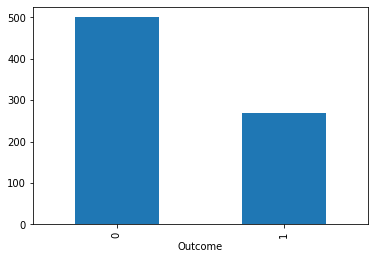

In [12]:
#showing diabetic and non diabetic in a bar chart
diabet = df.groupBy('Outcome').count()
diabet.show()
pandas_df.value_counts('Outcome').plot(kind = 'bar')

In [13]:
# showing correlations between columns
corr = pandas_df.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

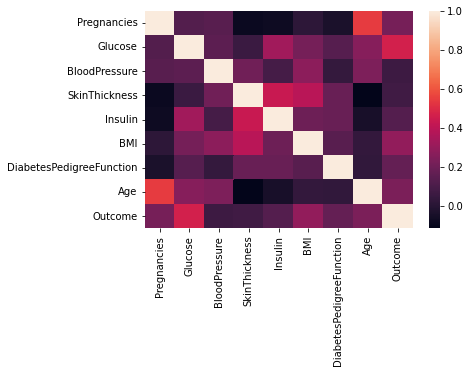

In [ ]:
# plotting using seaborn

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [31]:
diabetic_2 = df.select('Glucose', 'Outcome').filter(df.Glucose > 120.89) # -> all people with Glucose more than the mean (diabetic 1)
diabetic_1 = df.select('Glucose', 'Outcome').filter(df.Glucose > 100) # -> all people with Glucose between 100 and 120 (diabetic 2)
diabetic_1 = df.select('Glucose', 'Outcome').filter(df.Glucose < 120)

diab2 = diabetic_2.filter(diabetic_2.Outcome == 1).count()
diab1 = diabetic_1.filter(diabetic_1.Outcome == 1).count()

print("People that suffer diabetic 2 : " + str(diab2))
print("People that suffer diabetic 1 : " + str(diab1))

People that suffer diabetic 2 : 195
People that suffer diabetic 1 : 70


In [50]:
preg = df.select('Pregnancies','Glucose','Outcome').filter(df.Pregnancies == 0)
preg = preg.filter(preg.Glucose > 125).where(preg.Outcome == 1).count()

print("People with 0 pregnancies also above 125mg/DL Glucose and suffers diabetic : " + str(preg))

People with 0 pregnancies also above 125mg/DL Glucose and suffers diabetic : 27


In [67]:
gestasional = df.select('Pregnancies','Glucose','BMI','Age','Outcome').where(df.Glucose < 100)
gestasional = gestasional.filter(gestasional.Pregnancies > 1).where(gestasional.Outcome == 1).count()

print("People who probably have gestasional diabetic (happens when pregnancy) but have less than 100mg/DL Glucose : " + str(gestasional))

People who probably have gestasional diabetic (happens when pregnancy) but have less than 100mg/DL Glucose : 13


In [73]:
# converting collumns into vector datatype -> for women (bcs include pregnancies)
from pyspark.ml.feature import VectorAssembler

df.printSchema()

newFeatures = VectorAssembler(inputCols=['Pregnancies','Glucose','BMI','Age'],outputCol="Womenfeatures")
df = newFeatures.transform(df)

allFeatures = VectorAssembler(inputCols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],outputCol="Allfeatures")
df = allFeatures.transform(df)

noPregnant = VectorAssembler(inputCols=['Glucose','BMI','Age'],outputCol="featuresNoPreg")
df = noPregnant.transform(df)

noGlucose = VectorAssembler(inputCols=['Pregnancies','BMI','Age'],outputCol="featuresNoGluc")
df = noGlucose.transform(df)

noBMI = VectorAssembler(inputCols=['Pregnancies','Glucose','Age'],outputCol="featuresNoBMI")
df = noBMI.transform(df)

noAge = VectorAssembler(inputCols=['Pregnancies','Glucose','BMI'],outputCol="featuresNoAge")
df = noAge.transform(df)

df.printSchema()
df['Pregnancies','Glucose','BMI','Age','WomenFeatures','Allfeatures'].show(5)

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: float (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: float (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)
 |-- Womenfeatures: vector (nullable = true)
 |-- Allfeatures: vector (nullable = true)
 |-- featuresNoPreg: vector (nullable = true)
 |-- featuresNoGluc: vector (nullable = true)
 |-- featuresNoBMI: vector (nullable = true)


In [47]:
# main code (with 4 features)

# importing libraries for gbt
import pyspark.ml
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

labelIndexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in ['Pregnancies','Glucose','BMI','Age']]

(trainingData, testData) = df.randomSplit([0.7, 0.3], seed = 11)

#Chain indexers and GBT in a Pipeline
pipeline = Pipeline(stages=labelIndexers)

# Train a GBT model.
gbt = GBTClassifier(labelCol="Outcome", featuresCol="Womenfeatures", maxIter=10)

# Train model.  This also runs the indexers.
model = gbt.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "Outcome", "Womenfeatures").show()

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print("Accuracy of Gradient-boosted tree classifie is = %g"% (accuracy))
print("Test Error of Gradient-boosted tree classifier %g"% (1.0 - accuracy))

+----------+-------+--------------------+
|prediction|Outcome|       Womenfeatures|
+----------+-------+--------------------+
|       0.0|      0|[0.0,84.0,35.8,21.0]|
|       0.0|      0|[0.0,84.0,38.2,23.0]|
|       0.0|      0|[0.0,93.0,28.7,22.0]|
|       0.0|      0|[0.0,93.0,43.4,35.0]|
|       0.0|      0| [0.0,94.0,0.0,25.0]|
|       0.0|      0|[0.0,94.0,43.5,21.0]|
|       0.0|      0|[0.0,95.0,36.5,26.0]|
|       0.0|      1|[0.0,95.0,37.4,24.0]|
|       0.0|      0|[0.0,100.0,30.8,2...|
|       0.0|      0|[0.0,102.0,25.1,2...|
|       0.0|      0|[0.0,102.0,0.0,21.0]|
|       0.0|      0|[0.0,104.0,27.8,2...|
|       0.0|      0|[0.0,104.0,18.4,2...|
|       0.0|      1|[0.0,105.0,27.9,6...|
|       0.0|      0|[0.0,105.0,29.6,4...|
|       0.0|      0|[0.0,106.0,39.4,2...|
|       0.0|      0|[0.0,113.0,31.0,2...|
|       0.0|      0|[0.0,117.0,45.2,2...|
|       1.0|      1|[0.0,118.0,45.8,3...|
|       0.0|      1|[0.0,123.0,36.3,5...|
+----------+-------+--------------

In [48]:
# main code all features

import pyspark.ml
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

labelIndexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

(trainingData, testData) = df.randomSplit([0.7, 0.3], seed = 11)

#Chain indexers and GBT in a Pipeline
pipeline = Pipeline(stages=labelIndexers)

# Train a GBT model.
gbt = GBTClassifier(labelCol="Outcome", featuresCol="Allfeatures", maxIter=10)

# Train model.  This also runs the indexers.
model = gbt.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "Outcome", "Allfeatures").show()

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print("Accuracy of Gradient-boosted tree classifie is = %g"% (accuracy))
print("Test Error of Gradient-boosted tree classifier %g"% (1.0 - accuracy))

+----------+-------+--------------------+
|prediction|Outcome|         Allfeatures|
+----------+-------+--------------------+
|       0.0|      0|[0.0,84.0,64.0,22...|
|       0.0|      0|[0.0,84.0,82.0,31...|
|       0.0|      0|[0.0,93.0,60.0,25...|
|       0.0|      0|[0.0,93.0,100.0,3...|
|       0.0|      0|(8,[1,6,7],[94.0,...|
|       0.0|      0|[0.0,94.0,70.0,27...|
|       0.0|      0|[0.0,95.0,80.0,45...|
|       0.0|      1|[0.0,95.0,85.0,25...|
|       0.0|      0|[0.0,100.0,70.0,2...|
|       0.0|      0|[0.0,102.0,52.0,0...|
|       0.0|      0|[0.0,102.0,75.0,2...|
|       0.0|      0|[0.0,104.0,64.0,2...|
|       0.0|      0|[0.0,104.0,76.0,0...|
|       1.0|      1|[0.0,105.0,84.0,0...|
|       0.0|      0|[0.0,105.0,90.0,0...|
|       0.0|      0|[0.0,106.0,70.0,3...|
|       0.0|      0|[0.0,113.0,80.0,1...|
|       0.0|      0|[0.0,117.0,80.0,3...|
|       0.0|      1|[0.0,118.0,84.0,4...|
|       0.0|      1|[0.0,123.0,72.0,0...|
+----------+-------+--------------

In [70]:
# code without pregnancies

import pyspark.ml
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

labelIndexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in ['Glucose','BMI','Age']]

(trainingData, testData) = df.randomSplit([0.7, 0.3], seed = 11)

#Chain indexers and GBT in a Pipeline
pipeline = Pipeline(stages=labelIndexers)

# Train a GBT model.
gbt = GBTClassifier(labelCol="Outcome", featuresCol="featuresNoPreg", maxIter=10)

# Train model.  This also runs the indexers.
model = gbt.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "Outcome", "featuresNoPreg").show()

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print("Accuracy of Gradient-boosted tree classifie is = %g"% (accuracy))
print("Test Error of Gradient-boosted tree classifier %g"% (1.0 - accuracy))

+----------+-------+-----------------+
|prediction|Outcome|   featuresNoPreg|
+----------+-------+-----------------+
|       0.0|      0| [84.0,35.8,21.0]|
|       1.0|      0| [84.0,38.2,23.0]|
|       0.0|      0| [93.0,28.7,22.0]|
|       0.0|      0| [93.0,43.4,35.0]|
|       0.0|      0|  [94.0,0.0,25.0]|
|       0.0|      0| [94.0,43.5,21.0]|
|       0.0|      0| [95.0,36.5,26.0]|
|       0.0|      1| [95.0,37.4,24.0]|
|       0.0|      0|[100.0,30.8,21.0]|
|       0.0|      0|[102.0,25.1,21.0]|
|       0.0|      0| [102.0,0.0,21.0]|
|       0.0|      0|[104.0,27.8,23.0]|
|       0.0|      0|[104.0,18.4,27.0]|
|       0.0|      1|[105.0,27.9,62.0]|
|       1.0|      0|[105.0,29.6,46.0]|
|       0.0|      0|[106.0,39.4,22.0]|
|       0.0|      0|[113.0,31.0,21.0]|
|       0.0|      0|[117.0,45.2,24.0]|
|       1.0|      1|[118.0,45.8,31.0]|
|       1.0|      1|[123.0,36.3,52.0]|
+----------+-------+-----------------+
only showing top 20 rows

Accuracy of Gradient-boosted tree clas

In [71]:
# code without glucose

import pyspark.ml
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

labelIndexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in ['Pregnancies','BMI','Age']]

(trainingData, testData) = df.randomSplit([0.7, 0.3], seed = 11)

#Chain indexers and GBT in a Pipeline
pipeline = Pipeline(stages=labelIndexers)

# Train a GBT model.
gbt = GBTClassifier(labelCol="Outcome", featuresCol="featuresNoGluc", maxIter=10)

# Train model.  This also runs the indexers.
model = gbt.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "Outcome", "featuresNoGluc").show()

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print("Accuracy of Gradient-boosted tree classifie is = %g"% (accuracy))
print("Test Error of Gradient-boosted tree classifier %g"% (1.0 - accuracy))

+----------+-------+---------------+
|prediction|Outcome| featuresNoGluc|
+----------+-------+---------------+
|       0.0|      0|[0.0,35.8,21.0]|
|       0.0|      0|[0.0,38.2,23.0]|
|       0.0|      0|[0.0,28.7,22.0]|
|       0.0|      0|[0.0,43.4,35.0]|
|       0.0|      0| [0.0,0.0,25.0]|
|       1.0|      0|[0.0,43.5,21.0]|
|       0.0|      0|[0.0,36.5,26.0]|
|       0.0|      1|[0.0,37.4,24.0]|
|       0.0|      0|[0.0,30.8,21.0]|
|       0.0|      0|[0.0,25.1,21.0]|
|       0.0|      0| [0.0,0.0,21.0]|
|       0.0|      0|[0.0,27.8,23.0]|
|       0.0|      0|[0.0,18.4,27.0]|
|       0.0|      1|[0.0,27.9,62.0]|
|       0.0|      0|[0.0,29.6,46.0]|
|       0.0|      0|[0.0,39.4,22.0]|
|       0.0|      0|[0.0,31.0,21.0]|
|       0.0|      0|[0.0,45.2,24.0]|
|       0.0|      1|[0.0,45.8,31.0]|
|       0.0|      1|[0.0,36.3,52.0]|
+----------+-------+---------------+
only showing top 20 rows

Accuracy of Gradient-boosted tree classifie is = 0.68018
Test Error of Gradient-booste

In [74]:
# code without BMI

import pyspark.ml
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

labelIndexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in ['Pregnancies','Glucose','Age']]

(trainingData, testData) = df.randomSplit([0.7, 0.3], seed = 11)

#Chain indexers and GBT in a Pipeline
pipeline = Pipeline(stages=labelIndexers)

# Train a GBT model.
gbt = GBTClassifier(labelCol="Outcome", featuresCol="featuresNoBMI", maxIter=10)

# Train model.  This also runs the indexers.
model = gbt.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "Outcome", "featuresNoBMI").show()

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print("Accuracy of Gradient-boosted tree classifie is = %g"% (accuracy))
print("Test Error of Gradient-boosted tree classifier %g"% (1.0 - accuracy))

+----------+-------+----------------+
|prediction|Outcome|   featuresNoBMI|
+----------+-------+----------------+
|       0.0|      0| [0.0,84.0,21.0]|
|       0.0|      0| [0.0,84.0,23.0]|
|       0.0|      0| [0.0,93.0,22.0]|
|       0.0|      0| [0.0,93.0,35.0]|
|       0.0|      0| [0.0,94.0,25.0]|
|       0.0|      0| [0.0,94.0,21.0]|
|       0.0|      0| [0.0,95.0,26.0]|
|       0.0|      1| [0.0,95.0,24.0]|
|       0.0|      0|[0.0,100.0,21.0]|
|       0.0|      0|[0.0,102.0,21.0]|
|       0.0|      0|[0.0,102.0,21.0]|
|       0.0|      0|[0.0,104.0,23.0]|
|       0.0|      0|[0.0,104.0,27.0]|
|       0.0|      1|[0.0,105.0,62.0]|
|       0.0|      0|[0.0,105.0,46.0]|
|       0.0|      0|[0.0,106.0,22.0]|
|       0.0|      0|[0.0,113.0,21.0]|
|       0.0|      0|[0.0,117.0,24.0]|
|       0.0|      1|[0.0,118.0,31.0]|
|       0.0|      1|[0.0,123.0,52.0]|
+----------+-------+----------------+
only showing top 20 rows

Accuracy of Gradient-boosted tree classifie is = 0.711712
Test

Perbandingan accuracy dari 4 features yang telah dipilih dengan seluruh features adalah -> 72.0% : 72.9%

sedangkan jika kolom Glucose atau Pregnancies dihilangkan, accuracy turun -> 68%
ini menandakan kolom Glucose dan Pregnancies sangat berpengaruh dalam menentukan seorang wanita mengidap diabetes

In [75]:
# code without age

import pyspark.ml
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

labelIndexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in ['Pregnancies','Glucose','BMI']]

(trainingData, testData) = df.randomSplit([0.7, 0.3], seed = 11)

#Chain indexers and GBT in a Pipeline
pipeline = Pipeline(stages=labelIndexers)

# Train a GBT model.
gbt = GBTClassifier(labelCol="Outcome", featuresCol="featuresNoAge", maxIter=10)

# Train model.  This also runs the indexers.
model = gbt.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "Outcome", "featuresNoAge").show()

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print("Accuracy of Gradient-boosted tree classifie is = %g"% (accuracy))
print("Test Error of Gradient-boosted tree classifier %g"% (1.0 - accuracy))

+----------+-------+----------------+
|prediction|Outcome|   featuresNoAge|
+----------+-------+----------------+
|       0.0|      0| [0.0,84.0,35.8]|
|       0.0|      0| [0.0,84.0,38.2]|
|       0.0|      0| [0.0,93.0,28.7]|
|       0.0|      0| [0.0,93.0,43.4]|
|       0.0|      0|  [0.0,94.0,0.0]|
|       0.0|      0| [0.0,94.0,43.5]|
|       0.0|      0| [0.0,95.0,36.5]|
|       0.0|      1| [0.0,95.0,37.4]|
|       0.0|      0|[0.0,100.0,30.8]|
|       0.0|      0|[0.0,102.0,25.1]|
|       0.0|      0| [0.0,102.0,0.0]|
|       0.0|      0|[0.0,104.0,27.8]|
|       0.0|      0|[0.0,104.0,18.4]|
|       0.0|      1|[0.0,105.0,27.9]|
|       0.0|      0|[0.0,105.0,29.6]|
|       0.0|      0|[0.0,106.0,39.4]|
|       0.0|      0|[0.0,113.0,31.0]|
|       0.0|      0|[0.0,117.0,45.2]|
|       0.0|      1|[0.0,118.0,45.8]|
|       0.0|      1|[0.0,123.0,36.3]|
+----------+-------+----------------+
only showing top 20 rows

Accuracy of Gradient-boosted tree classifie is = 0.711712
Test

In [72]:
# dropping the collumns we dont need or reset some collumn

df = df.drop(col("Womenfeatures"))
df = df.drop(col("Allfeatures"))
df = df.drop(col("featuresNoPreg"))
df = df.drop(col("featuresNoGluc"))
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: float (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)

